Kenza Battaglia. TD2 - Résolution d'équations algébriques

In [6]:
from math import exp
from math import sqrt

In [7]:
import matplotlib.pyplot as plt 
import numpy as np

Q1. Complexité spatiale: O(1)
    Complexité temporelle: O(n)

In [1]:
def dicho1(f,a,b,n):
    c=(a+b)/2
    if f(a)*f(b)>0:    #On vérifie la condition initiale
        return "la fonction ne s'annule pas sur cet intervalle"
    for i in range(n):
        if f(a)*f(c)<=0:  
            gauche, droite = a, c
        else:
            gauche, droite = c, b
    return (a,b)

Q2.    Thèoriquement la fonction renvoie "la fonction ne s'annule pas sur cet intervalle" car f n'admet pas de racine sur [a,b]

In [3]:
dicho1(exp,0,1,10)

"la fonction ne s'annule pas sur cet intervalle"

Q3. Il s'agit d'un polynome du second degré donc g admet au maximum deux racines: alpha=(-b-sqrt(D))/(2*a) et beta=(-b+sqrt(D))/(2*a). g(1)=-6 et g(2)=5 donc le segment [1,2] contient une racine. De plus, g(-2)=-3
et g(-3)=5 donc le segment [-2,-3] contient la deuxième racine.

In [4]:
def g(x):
    return(3*(x**2))+(2*x)-11

Q4.

In [5]:
def dicho2(f,a,b,eps):
    n=0
    while abs(b-a)>eps:
        n+=1
        c=(a+b)/2
        if f(a)*f(c)<=0:
            b=c
        else:
            a=c
    return (c,n)

Q5.

In [6]:
dicho2(g,1,2,10**-10)

(1.610317298269365, 34)

In [7]:
dicho2(g,-2,-3,10**-10)

(-2.2769839648972265, 34)

Q6.

On deduit n de la relation:   ((b-a)/2**n =< eps

On trouve n => ln((b-a)/eps)

In [8]:
dicho1(g,1,2,41)

(1.5, 2)

Q7.

on trouve c= a - (f(a)*(b-a)/f(b) -f(a))

Q8.

In [10]:
def mfp(f,a,b,eps):
    n=0
    while abs(b-a)>eps and n<1000 :    #on rajoute un n pour ne pas que ca bloque
        n+=1
        c = a - (f(a)*(b-a)/(f(b)-f(a)))
        if f(a)*f(c)<=0:
            b=c
        else:
            a=c
    return (c,n)

In [19]:
mfp(g,1,2,10**-10)

(1.6103172982817668, 16)

In [12]:
mfp(g,-3,-2,10**-10)

(-2.2769839649484336, 1000)

Q9.

In [13]:
def ListeTerme(f,fprime,u0,n):
    L=[u0]
    u= u0
    g= lambda x: x-(f(x)/fprime(x))   #lambda permet d'introduire des fonctions localement
    for i in range (1,n+1):
        u=g(u)
        L.append(u)
    return L

In [14]:
ListeTerme(lambda x: x**2 - 3,lambda x: 2*x,1,10)

[1,
 2.0,
 1.75,
 1.7321428571428572,
 1.7320508100147276,
 1.7320508075688772,
 1.7320508075688774,
 1.7320508075688772,
 1.7320508075688774,
 1.7320508075688772,
 1.7320508075688774]

Reaction? vitesse de convergence

Q10.

In [16]:
def Newton(f,fprime,u0,eps):
    u1= u0-(f(u0)/fprime(u0))
    n=0
    while abs(u1-u0)>eps: 
        n+=1
        u0=u1
        u1 -= f(u1)/fprime(u1)
    return(u0,n)

Q11.

In [2]:
def f(x):
    return 2*x**5 - 15*x**4 + 40*x**3 - 20*x**2 -10*x + 2

In [3]:
def fprime(x):
    return 10*x**4 - 60*x**3 + 120*x**2 - 40*x - 10

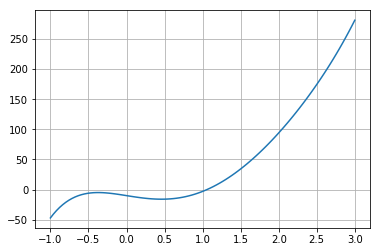

In [12]:
X = np.linspace(-1, 3, 100)
Y = f(X)
plt.plot(X,Y)
plt.grid()
plt.show()

Q12.

In [27]:
def ListeTermeSecante(f,v0,v1,n):
    L=[v0,v1]
    v= v1 - ((v1-v0)/(f(v1)-f(v0)))*f(v1)
    for i in range (2,n+1):
        v0=v1
        v1=v
        L.append(v)
    return L

In [31]:
for i in range(7,11):
    print (ListeTermeSecante(lambda x:(x**2)-3,1,2,i))

[1, 2, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]
[1, 2, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]
[1, 2, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]
[1, 2, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]


Q13.

In [45]:
def Secante(f,v0,v1,eps):
    L=[v0,v1]
    n=0
    v= v1 - ((v1-v0)/(f(v1)-f(v0)))*f(v1)
    while abs(v1-v0)>eps:
        n+=1
        v0=v1
        v1=v
    L.append(v)
    return (v,n)

Q14.

In [46]:
for i in range(1,16):
    print(dicho2(lambda x : (x**2)-3,1,2,10**-i),mfp(lambda x : (x**2)-3,1,2,10**-i),Newton(lambda x : (x**2)-3,lambda x :2*x,1,10**-i),Secante(lambda x : (x**2)-3,1,2,10**-i))

(1.6875, 4) (1.7320508075688774, 15) (1.75, 2) (1.6666666666666667, 2)
(1.7265625, 7) (1.7320508075688774, 15) (1.7321428571428572, 3) (1.6666666666666667, 2)
(1.7314453125, 10) (1.7320508075688774, 15) (1.7321428571428572, 3) (1.6666666666666667, 2)
(1.73199462890625, 14) (1.7320508075688774, 15) (1.7321428571428572, 3) (1.6666666666666667, 2)
(1.7320480346679688, 17) (1.7320508075688774, 15) (1.7320508100147276, 4) (1.6666666666666667, 2)
(1.732050895690918, 20) (1.7320508075688774, 15) (1.7320508100147276, 4) (1.6666666666666667, 2)
(1.7320508360862732, 24) (1.7320508075688774, 15) (1.7320508100147276, 4) (1.6666666666666667, 2)
(1.7320508137345314, 27) (1.7320508075688774, 15) (1.7320508100147276, 4) (1.6666666666666667, 2)
(1.7320508072152734, 30) (1.7320508075688774, 15) (1.7320508075688772, 5) (1.6666666666666667, 2)
(1.732050807622727, 34) (1.7320508075688774, 15) (1.7320508075688772, 5) (1.6666666666666667, 2)
(1.7320508075717953, 37) (1.7320508075688774, 15) (1.73205080756887